###### Mounting the google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


######  Installing fastparquet library

In [2]:
# Fastparquet is required for some applications because it provides better performance than the other Python implementations of Parquet.
# It can be up to 10x faster than PyArrow for reading and writing Parquet files.
!pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.0 MB/s eta 0:00:00


In [3]:
# !pip install transformers is used to quickly install the "transformers"
# library in Python, which provides access to pre-trained models
# and powerful tools for natural language processing tasks.
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.8 MB/s eta 0:00:00


### Importing the required dependencies

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import time
import regex
import string
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import nltk
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score,accuracy_score,classification_report
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

In [5]:
# Reading the parquet dataset
df = pd.read_parquet('/content/drive/MyDrive/colab/kavida/kavida.ai/query_result_2000.993493Z (1).parquet', engine='fastparquet')

In [ ]:
# Viewing the first location title
df['title'].iloc[0]

'Will the Covid-19 Grinch cancel a Santa rally on the stock markets?'

In [ ]:
# Viewing the first location event_timestamp
df.event_timestamp.iloc[0]

'2021-12-20T12:34:00Z'

In [ ]:
# Viewing the first five rows of the dataset
df.head()

,title,paragraph,news_list,event_timestamp
0,Will the Covid-19 Grinch cancel a Santa rally ...,OPINION: Stock markets typically trade higher ...,"[""Supplier Market""]",2021-12-20T12:34:00Z
1,SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...,SPDR S&P Oil & Gas Exploration & Production ET...,"[""Financial Health""]",2021-12-20T12:31:00Z
2,"Britain reports 10,000 new Omicron cases, ‘maj...",The total number of Omicron cases recorded acr...,"[""Environmental""]",2021-12-20T12:31:00Z
3,Risk aversion sentiment continues to percolate,- Risk aversion sentiment on rapid spread of t...,"[""Commodities""]",2021-12-20T12:30:00Z
4,Omicron rush on boosters may make it harder to...,Countries are saying three vaccine doses are n...,"[""Commodities""]",2021-12-20T12:16:00Z


In [ ]:
# Viewing the bottom five rows of the dataset
df.tail()

,title,paragraph,news_list,event_timestamp
1995,Covid cases rise in the US as Omicron now in o...,Coronavirus infections are increasing in nearl...,"[""Financial Health""]",2021-12-14T01:37:00Z
1996,Factbox- banks tighten COVID-19 precautions as...,U.S. banks have been more proactive than other...,"[""Financial Health""]",2021-12-14T01:33:00Z
1997,"New SARS-CoV-2 variant a wake-up call for US, ...",A new variant of SARS-CoV-2 was first isolated...,"[""Commodities""]",2021-12-14T01:28:00Z
1998,Five new symptoms of Omicron - and how new var...,The NHS website still asks anyone with the thr...,"[""Environmental""]",2021-12-14T01:26:00Z
1999,Watch now: County executive says omicron has c...,"St. Louis County Executive Sam Page on Monday,...","[""Commodities""]",2021-12-14T01:26:00Z


In [ ]:
# Viewing the shape of the dataset
df.shape

(2000, 4)

In [ ]:
# Viewing the columns of the dataset
df.columns

Index(['title', 'paragraph', 'news_list', 'event_timestamp'], dtype='object')

In [ ]:
# Checking the total number of duplicated values in the dataset
df.duplicated().sum()

13

In [ ]:
# Dropping the duplicates from the dataset
df = df.drop_duplicates()

In [ ]:
# Checking the null values of the dataset
df.isnull().sum()

title              0
paragraph          0
news_list          0
event_timestamp    0
dtype: int64

In [ ]:
# Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            1987 non-null   object
 1   paragraph        1987 non-null   object
 2   news_list        1987 non-null   object
 3   event_timestamp  1987 non-null   object
dtypes: object(4)
memory usage: 77.6+ KB


In [ ]:
# Using the describe to see some simple stats like count, frequency,etc.
df.describe()

,title,paragraph,news_list,event_timestamp
count,1987,1987,1987,1987
unique,1970,1944,6,1768
top,Twitter @PDChina #omicron,"Welcome to Tuesday, where Omicron now looms ov...","[""Environmental""]",2021-12-16T21:04:00Z
freq,7,5,539,4


In [ ]:
# Using the nunique to count the number of unique values in each feature
df.nunique()

title              1970
paragraph          1944
news_list             6
event_timestamp    1768
dtype: int64

## Data Proprocessing/Cleaning

In [6]:
# Converting the event_timestamp feature into pandas date format
df['date'] = pd.to_datetime(df['event_timestamp'])

In [7]:
# The below code deals with the list value present in the news_list column and it it converting it into only string dtype.
l = []
for i in df['news_list']:
    a = i[2:-2]
    l.append(a)

In [8]:
# Overwriting the values of feature news_list by newly generated data stored in l.
df['news_list'] = l

In [9]:
# Using the unique function to check unique values in news_list
df["news_list"].unique()

array(['Supplier Market', 'Financial Health', 'Environmental',
       'Commodities', 'Compliance', 'Delays'], dtype=object)

In [ ]:
# Checking the count of each items in the news_list feature
df['news_list'].value_counts()

Environmental       539
Commodities         502
Delays              364
Financial Health    302
Compliance          159
Supplier Market     121
Name: news_list, dtype: int64

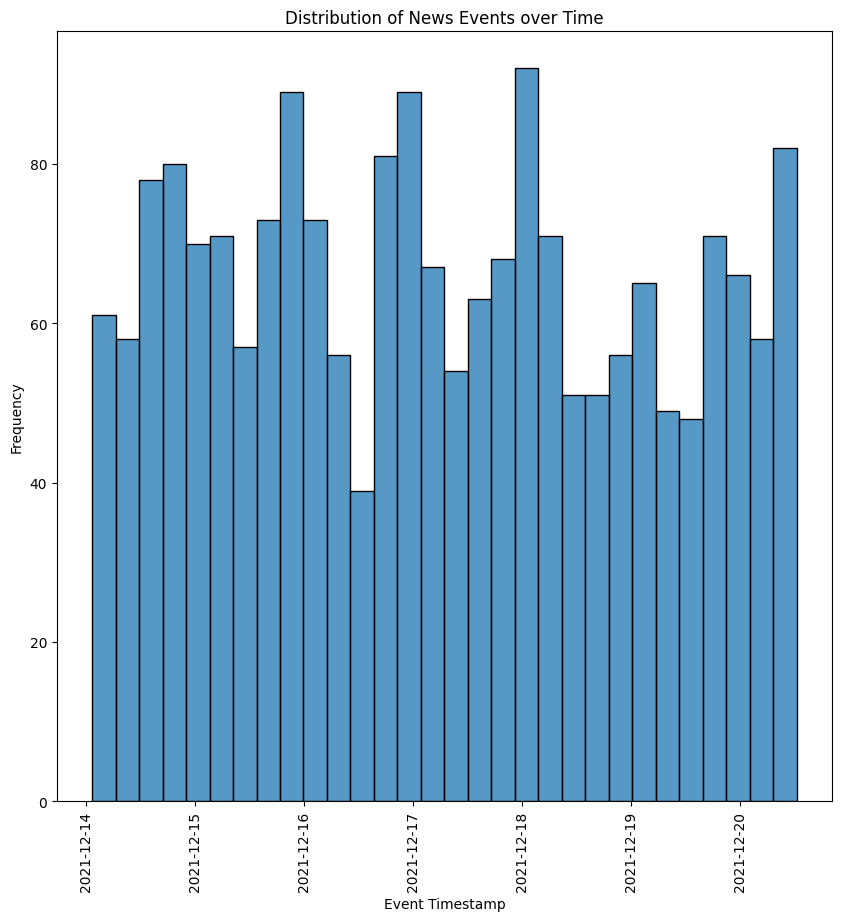

In [ ]:
# Example 2: Distribution of news events over time
plt.figure(figsize=(10,10))
sns.histplot(data=df, x='date', bins=30)
plt.title('Distribution of News Events over Time')
plt.xlabel('Event Timestamp')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show()

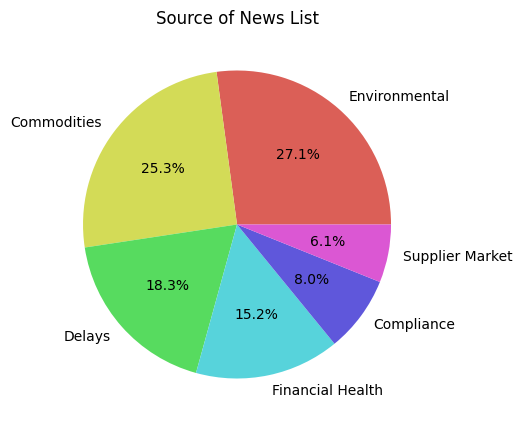

In [ ]:
# Plotting the unique value of the news_list feature using a pie chart
plt.figure(figsize = (5,5))
counts = df['news_list'].value_counts()
plt.pie(counts,labels = counts.index,autopct = "%1.1f%%",colors = sns.color_palette('hls'))
plt.title("Source of News List")
plt.show()

In [ ]:
# Plotting the unique value of the news_list feature using a plotly pie chart
counts = df['news_list'].value_counts()
fig = go.Figure(data = [go.Pie(labels = counts.index,values = counts)])
fig.update_layout(title = "Source of News List")
fig.show()

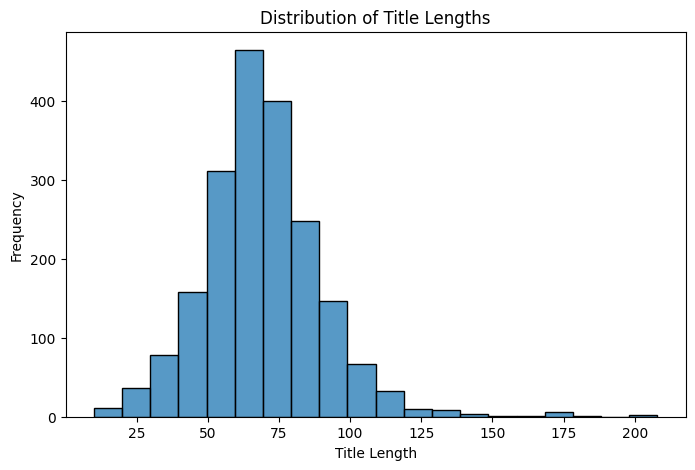

In [ ]:
# Distribution of Title Lengths
df['title_length'] = df['title'].apply(lambda x: len(x))
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='title_length', bins=20)
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

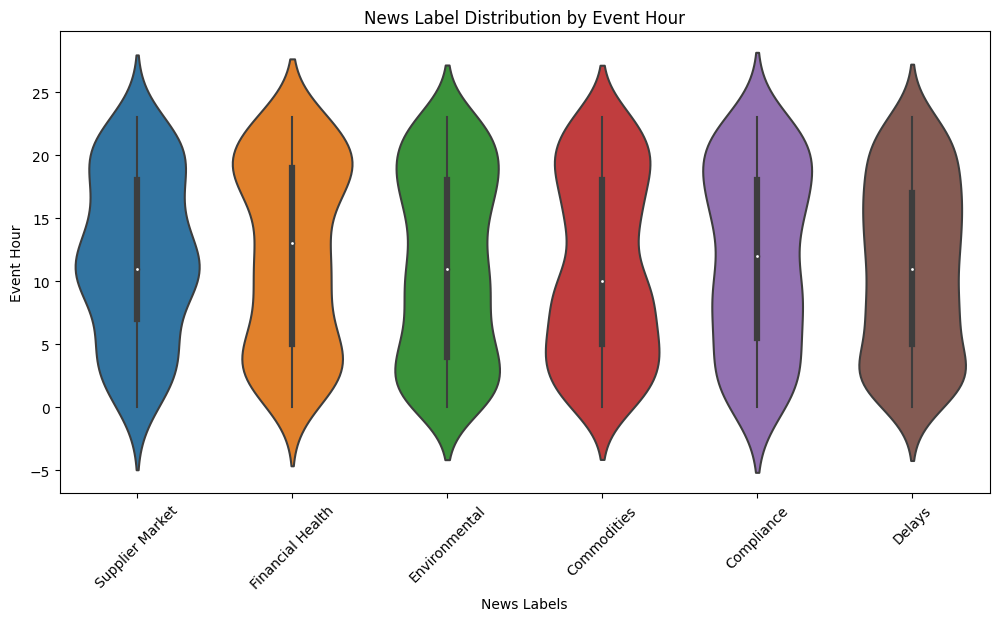

In [ ]:
#News Label Distribution by Event Hour
df['event_hour'] = df['date'].dt.hour
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='news_list', y='event_hour')
plt.title('News Label Distribution by Event Hour')
plt.xlabel('News Labels')
plt.ylabel('Event Hour')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Making the copy of the dataset df and using date to be as an index
df1 = df.copy()
df2 = df1.set_index("date")
df2

,title,paragraph,news_list,event_timestamp
date,,,,
2021-12-20 12:34:00+00:00,Will the Covid-19 Grinch cancel a Santa rally ...,OPINION: Stock markets typically trade higher ...,Supplier Market,2021-12-20T12:34:00Z
2021-12-20 12:31:00+00:00,SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...,SPDR S&P Oil & Gas Exploration & Production ET...,Financial Health,2021-12-20T12:31:00Z
2021-12-20 12:31:00+00:00,"Britain reports 10,000 new Omicron cases, ‘maj...",The total number of Omicron cases recorded acr...,Environmental,2021-12-20T12:31:00Z
2021-12-20 12:30:00+00:00,Risk aversion sentiment continues to percolate,- Risk aversion sentiment on rapid spread of t...,Commodities,2021-12-20T12:30:00Z
2021-12-20 12:16:00+00:00,Omicron rush on boosters may make it harder to...,Countries are saying three vaccine doses are n...,Commodities,2021-12-20T12:16:00Z
...,...,...,...,...
2021-12-14 01:37:00+00:00,Covid cases rise in the US as Omicron now in o...,Coronavirus infections are increasing in nearl...,Financial Health,2021-12-14T01:37:00Z
2021-12-14 01:33:00+00:00,Factbox- banks tighten COVID-19 precautions as...,U.S. banks have been more proactive than other...,Financial Health,2021-12-14T01:33:00Z
2021-12-14 01:28:00+00:00,"New SARS-CoV-2 variant a wake-up call for US, ...",A new variant of SARS-CoV-2 was first isolated...,Commodities,2021-12-14T01:28:00Z


In [ ]:
# Checking the start date and end date,
start_date = df1['date'].min()
end_date  = df1['date'].max()
print("Start date of news :", start_date)
print("End date of news :",end_date)

Start date of news : 2021-12-14 01:26:00+00:00
End date of news : 2021-12-20 12:34:00+00:00


In [ ]:
## Plotting the graph to count how many news_type, paragraph,title comes at each day
week_delta = pd.Timedelta(days = 7)
current_date = start_date
while current_date <= end_date:
    start_week = current_date
    end_week = current_date + week_delta
    current_week_data = df2[(df2.index >= start_week) & (df2.index < end_week)]
    weekly_counts = current_week_data.resample("D").size()
    fig = px.bar(weekly_counts,x = weekly_counts.index,y = weekly_counts.values,
                labels = {"x":"Date","y":"Number of news source title-paragraph"},
                title = f'News Source {start_week.strftime("%Y-%m-%d")} to {end_week.strftime("%Y-%m-%d")}')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()
    current_date += week_delta

In [ ]:
# The below code also give the count of how many news_type, paragraph,title comes at each day
daily_counts = df2.resample("D").size()
daily_counts

date
2021-12-14 00:00:00+00:00    299
2021-12-15 00:00:00+00:00    338
2021-12-16 00:00:00+00:00    313
2021-12-17 00:00:00+00:00    309
2021-12-18 00:00:00+00:00    283
2021-12-19 00:00:00+00:00    279
2021-12-20 00:00:00+00:00    166
Freq: D, dtype: int64

##### Cleaning the text

In [11]:
## Making  a copy of the dataset so we can preserve the original dataset
df3 = df1.copy()

In [12]:
# pip install nltk is used to install the Natural Language Toolkit (NLTK) library in Python, which provides
# powerful tools for processing and analyzing human language data, particularly in the field of natural language processing (NLP).
!pip install nltk
nltk.download('stopwords')
stop_list = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
# The provided code installs and sets up spaCy,
# a library for natural language processing in Python.
# It downloads the English language model, enabling you to perform various NLP tasks with ease.
!pip install -U spacy
import spacy
import blis
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 61.0 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.4
    Uninstalling spacy-3.5.4:
      Successfully uninstalled spacy-3.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.5.0 requires spacy<3.6.0,>=3.5.0, but you have spacy 3.6.0 which is incompatible.
2023-07-31 04:41:17.586835: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.2 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.5.0
    Uninstalling en-core-web-sm-3.5.0:
      Successfully uninstalled en-core-web-sm-3.5.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [14]:
# Cleaning ,removing - (stopwords,digits,punctuations), tokenizing the text,lemmatizing the text
def clean_text(text):
    text = text.lower()
    return text.strip()

def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

def remove_stopwords(text):
    output = " ".join([i for i in text if i not in stop_list])
    return output

def lemmatizer(text):
  doc = nlp(text)
  sent = [token.lemma_ for token in doc if not token.text in set(stop_list)]
  return ' '.join(sent)

def remove_digits(text):
  clean_text = re.sub(r"\b[0-9]+\b\s*","",text)
  clean_text = " ".join([w for w in text.split() if not w.isdigit()])
  return clean_text

In [15]:
## Applying the clean_text function to clean some unwanted text and stripping
df3["title_new"] = df3['title'].apply(lambda x:clean_text(x))
df3["paragraph_new"] = df3['paragraph'].apply(lambda x:clean_text(x))

## Applying the remove_punctuation function to remove punctuations
df3["title_new"] = df3['title'].apply(lambda x:remove_punctuation(x))
df3["paragraph_new"] = df3['paragraph'].apply(lambda x:remove_punctuation(x))

## Applying the tokenization function to perform tokenization
df3["title_new"] = df3['title'].apply(lambda x:tokenization(x))
df3["paragraph_new"] = df3['paragraph'].apply(lambda x:tokenization(x))

## Applying the remove_stopwords function to remove stopwords from the columns
df3["title_new"] = df3['title'].apply(lambda x:remove_stopwords(x))
df3["paragraph_new"] = df3['paragraph'].apply(lambda x:remove_stopwords(x))


## Applying the lemmatizer function to do lemmatizer operation on the columns
df3["title_new"] = df3['title'].apply(lambda x:lemmatizer(x))
df3["paragraph_new"] = df3['paragraph'].apply(lambda x:lemmatizer(x))

## Applying the lemmatizer function to do remove_digits operation on the columns
df3["title_new"] = df3['title'].apply(lambda x:remove_digits(x))
df3["paragraph_new"] = df3['paragraph'].apply(lambda x:remove_digits(x))

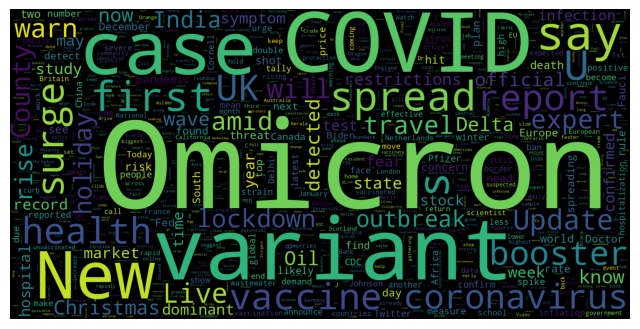

In [16]:
# Shows words of title_new column
data = df3.title_new
plt.figure(figsize = (8,8))
wc = WordCloud(max_words = 1000,width = 1600,height= 800,collocations  = False).generate(" ".join(data))
plt.imshow(wc)
plt.axis("off")
plt.show()

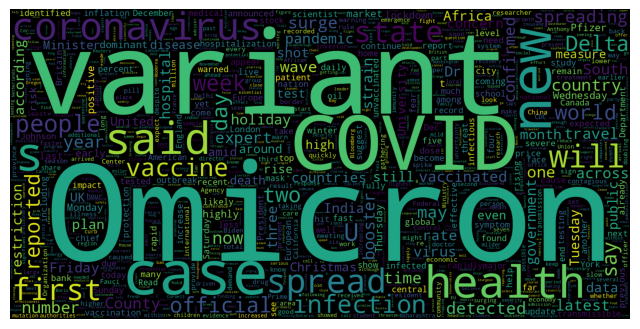

In [ ]:
# Shows words of paragraph_new column
data_1 = df3.paragraph_new
plt.figure(figsize = (8,8))
wc = WordCloud(max_words = 1000,width = 1600,height= 800,collocations  = False).generate(" ".join(data_1))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
df3.news_list.unique().tolist()

['Supplier Market',
 'Financial Health',
 'Environmental',
 'Commodities',
 'Compliance',
 'Delays']

In [ ]:
# Show words for each type of news_list with respect to paragraph_new
for i in df3.news_list.unique().tolist():
  data_1 = df3[df3['news_list']==i]['paragraph_new']
  plt.figure(figsize = (8,8))
  wc = WordCloud(max_words = 500,width = 1600,height= 800,collocations  = False).generate(" ".join(data_1))
  plt.imshow(wc)
  plt.axis("off")
  plt.title(f'The words regarding news_list {i} in paragraph is')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Show words for each type of news_list with respect to title_new
for i in df3.news_list.unique().tolist():
  data_1 = df3[df3['news_list']==i]['title_new']
  plt.figure(figsize = (8,8))
  wc = WordCloud(max_words = 500,width = 1600,height= 800,collocations  = False).generate(" ".join(data_1))
  plt.imshow(wc)
  plt.axis("off")
  plt.title(f'The words regarding news_list {i} in title is')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [17]:
### combining the title_new and paragraph_new feature into a single column
df3['combined_text'] = df3['title_new'] + df3['paragraph_new']

In [18]:
#label_encoder = preprocessing.LabelEncoder() is used to transform categorical labels into numerical values, making them usable in machine learning models.
label_encoder =  preprocessing.LabelEncoder()
df3["news_l_e"] = df3['news_list']
df3['news_l_e'] = label_encoder.fit_transform(df3['news_l_e'])

In [19]:
# Stroing labelEncoded Values in a y variable
y = df3['news_l_e'].values

In [20]:
# Checking all the unique values in news_l_e feature
df3['news_l_e'].unique()

array([5, 4, 3, 0, 1, 2])

In [29]:
# Mapping all  the news_l_e feature values to a categorical variable
df3['news_l_e_map'] = df3.news_l_e.map({0:"A",1:"B",2:"C",3:"D",4:"E",5:"F"})
dic_num_news = {0:"Commodities",1:"Compliance",2:"Delays",3:"Environmental",4:"Financial Health",5:"Supplier Market"}
dic = {"A":"Commodities","B":"Compliance","C":"Delays","D":"Environmental","E":"Financial Health","F":"Supplier Market"}

In [ ]:
# It will print line by line, the news list type, title name and the paragraph name
print("Sample titles:")
for i in range(len(df3)):
  print(f"Title No. is {i+1}:")
  print(f"Title is:",df3['title_new'].iloc[i])
  print("Paragraph is:",df3['paragraph_new'].iloc[i])
  print("News List type is :,")
  print(df3['news_list'].iloc[i])
  print()

Streaming output truncated to the last 5000 lines.
Environmental

Title No. is 1155:
Title is: Lockdown in Karnataka only if.. Technical Committee has this advise
Paragraph is: With new cases of Omicron being reported there is widespread fear that has gripped the country. In this backdrop Karnataka's COVID-19 Technical Advisory Committee held its second review meeting.
News List type is :,
Commodities

Title No. is 1156:
Title is: Get informed on the top stories of the day in one quick scan
Paragraph is: Good morning! This is our daily news roundup with everything you need to know in one concise read. Sign up here to get this delivered to your inbox every morning. Be 'ready to pivot' domestic holiday travel plans amid rapidly spreading omicron variant, medical experts say The rapidly spreading omicron coronavirus variant means Canadians should be "ready to pivot" their travel plans within the country during this holiday season, said medical experts studying COVID-19. "If [you] can avoi

In [ ]:
# News list type
correct_news_list_type = df3['news_list'].value_counts()
print("Distribution of Correct news list type:")
print(correct_news_list_type)
print()

Distribution of Correct news list type:
Environmental       539
Commodities         502
Delays              364
Financial Health    302
Compliance          159
Supplier Market     121
Name: news_list, dtype: int64



In [ ]:
# Common patters observed in title
common_patterns = df3['title'].str.extract(r'(Which|What|How|When|Why|Where)').value_counts()
print("Common Patterns in title: ")
print(common_patterns)
print()

# Common patters observed in paragraph
common_patterns = df3['paragraph'].str.extract(r'(Which|What|How|When|Why|Where)').value_counts()
print("Common Patterns in paragraph: ")
print(common_patterns)
print()

Common Patterns in title: 
What     76
How      37
Why      15
When      5
Where     2
dtype: int64

Common Patterns in paragraph: 
How      15
What     14
When      8
Where     3
Why       2
Which     1
dtype: int64



#### Using transfer learning to fine-tune a classification model

In [22]:
# The code imports the required libraries, torch and transformers,
# to work with pre-trained BERT models and perform sequence classification tasks using BERT's capabilities.
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Splitting the dataset into train and test, than convert them to list

In [23]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df3, test_size=0.2, random_state=42)

# Separate the text and labels for training and testing
train_texts, train_labels = train_df['combined_text'].tolist(), train_df['news_l_e'].tolist()
test_texts, test_labels = test_df['combined_text'].tolist(), test_df['news_l_e'].tolist()

In [24]:
# The code initializes a BERT tokenizer and a BERT model for sequence classification
# using the 'bert-base-uncased' pre-trained version. The tokenizer is used to
# preprocess text data, while the model is a pre-trained neural network
# designed for sequence classification tasks, such as sentiment analysis or text categorization.

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=len(label_encoder.classes_))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


###  tokenize and encode sequences in the training set and make them to Tensors

In [25]:
# Tokenize the texts and convert them to input tensors
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=256, return_tensors='pt')
train_dataset = TensorDataset(train_encodings.input_ids, train_encodings.attention_mask, torch.tensor(train_labels))

test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=256, return_tensors='pt')
test_dataset = TensorDataset(test_encodings.input_ids, test_encodings.attention_mask, torch.tensor(test_labels))

## Data Loader

In [26]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Move the model to the appropriate device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [27]:
# Define the optimizer and criterion

optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()


# Training Loop

num_epochs = 1

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch + 1}/{num_epochs} - Average Training Loss: {avg_train_loss:.4f}')


Epoch 1/1 - Average Training Loss: 1.6565


In [28]:
# Evaluation

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        _, predicted = torch.max(logits, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())


In [33]:
dic_num_news
y_pred_news= []
for i in y_pred:
  if i == 0:
    y_pred_news.append('Commodities')
  elif i == 1:
    y_pred_news.append('Compliance')
  elif i == 2:
    y_pred_news.append('Delays')
  elif i == 3:
    y_pred_news.append('Environmental')
  elif i == 4:
    y_pred_news.append('Financial Health')
  else:
    y_pred_news.append('Supplier Market')

y_true_news= []
for i in y_true:
  if i == 0:
    y_true_news.append('Commodities')
  elif i == 1:
    y_true_news.append('Compliance')
  elif i == 2:
    y_true_news.append('Delays')
  elif i == 3:
    y_true_news.append('Environmental')
  elif i == 4:
    y_true_news.append('Financial Health')
  else:
    y_true_news.append('Supplier Market')

In [41]:
# Plotting the unique value of the news_list predicted feature using a plotly pie chart
dic_pred_y = {"y_pred__label":y_pred_news}
df_pred_y = pd.DataFrame.from_dict(dic_pred_y)
counts = df_pred_y['y_pred__label'].value_counts()
fig = go.Figure(data = [go.Pie(labels = counts.index,values = counts)])
fig.update_layout(title = "Source of News List_pred")
fig.show()

In [42]:
# Plotting the unique value of the news_list predicted feature using a plotly pie chart
dic_pred_true_y = {"y_pred__label":y_true_news}
df_pred_true_y = pd.DataFrame.from_dict(dic_pred_true_y)
counts = df_pred_true_y['y_pred__label'].value_counts()
fig = go.Figure(data = [go.Pie(labels = counts.index,values = counts)])
fig.update_layout(title = "Source of News List_True")
fig.show()

In [ ]:
accuracy = accuracy_score(y_true, y_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

Test Accuracy: 36.43%
                  precision    recall  f1-score   support

     Commodities       0.36      0.85      0.51       107
      Compliance       0.44      0.26      0.33        31
          Delays       0.18      0.04      0.06        79
   Environmental       0.38      0.31      0.34       115
Financial Health       0.00      0.00      0.00        41
 Supplier Market       0.50      0.28      0.36        25

        accuracy                           0.36       398
       macro avg       0.31      0.29      0.27       398
    weighted avg       0.31      0.36      0.30       398



# Single Input Prediction system

In [ ]:
# Function for single input prediction
def predict_single_input(model, input_paragraph):
    model.eval()
    inputs = tokenizer(input_paragraph, truncation=True, padding=True, max_length=256, return_tensors='pt')
    input_ids, attention_mask = inputs.input_ids.to(device), inputs.attention_mask.to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        _, predicted = torch.max(logits, 1)
        predicted_label = label_encoder.classes_[predicted.item()]

    return predicted_label


# Example usage of the predict_single_input function
input_paragraph = "OPINION: The current stock market situation is worrisome."
predicted_label = predict_single_input(model, input_paragraph)
print(f"Predicted Label: {predicted_label}")

Enter the combined text:-
Predicted Label: Delays


In [ ]:
# Save the pre-trained model
def save_model(model, path):
    model.to('cpu')  # Move the model to CPU before saving
    torch.save(model.state_dict(), path)

In [ ]:
# Load the pre-trained model
def load_model(model_class, num_labels, path):
    model = model_class.from_pretrained('bert-base-uncased', num_labels=num_labels)
    model.load_state_dict(torch.load(path))
    model.to(device)  # Move the model back to the appropriate device
    return model

In [ ]:
# Example usage of the save_model and load_model functions
# Save the pre-trained model
save_model(model, '/content/drive/MyDrive/colab/kavida/kavida.ai/pretrained_model.pt')

In [ ]:
# Load the pre-trained model
loaded_model = load_model(BertForSequenceClassification, len(label_encoder.classes_), '/content/drive/MyDrive/colab/kavida/kavida.ai/pretrained_model.pt')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Example usage of the predict_single_input function with the loaded model
input_paragraph = "5th Omicron COVID-19 Case Reported In GA As State Remains Poised To Respond5th Omicron Case Reported In GA; What Percent Are New Variant? - Atlanta, GA - The omicron variant of the coronavirus has spread quickly in the northeastern U.S. Here's what share of COVID cases in GA are from omicron."
predicted_label = predict_single_input(loaded_model, input_paragraph)
print(f"Predicted Label: {predicted_label}")

Predicted Label: Environmental


## Rationale behind the BERT model

In [ ]:
## BERT is a transformer-based model, and its key innovation
# lies in the concept of bidirectionality. Unlike traditional
# language models that read text in one direction (e.g., from left to right or right to left),
# BERT employs a bidirectional context prediction technique. It predicts each word based
# on the words that come before and after it, thus capturing richer contextual information.

# Since we have to use transfer learning to fine tune this classification , so BERT is a good choice
# Transfer Learning: BERT's pre-trained weights are valuable knowledge
# that can be transferred to downstream NLP tasks. By fine-tuning BERT on
# a specific task, it can adapt its contextual embeddings to the
# task-specific domain, leading to better performance with fewer labeled training samples.

# In the context of the provided problem statement
# (classifying articles), using BERT allows the model
# to leverage its pre-trained knowledge of language, context,
# and semantics. Fine-tuning BERT on the task-specific dataset
#  enables it to learn to classify articles based on the textual
# information present in the 'paragraph' column and predict the corresponding category ('news_list') effectively.

### Rationale behind the Evaluation metrics -  Classification Report,Accuracy_Score

In [ ]:
# To evaluate the predictions of the BERT model,
# we can use several standard evaluation metrics
#  that are commonly used for multi-class classification tasks.
# Here are some of the main metrics along with their rationales:

# Classification Report: The classification report combines precision, recall, F1 score, and support for each class in a compact format.

# Rationale: The classification report provides a comprehensive summary of the model's performance for all classes.
# It is a convenient way to compare the model's metrics across different classes.


#Accuracy: Accuracy is the most straightforward metric and measures the proportion of correctly predicted labels out of all the samples in the dataset.
# It is a simple and intuitive metric that provides an overall assessment of the model's performance.

# Rationale: Accuracy is useful when the classes in the dataset are balanced, i.e.,
#  there are approximately equal samples for each class. However, accuracy may not
#  be suitable for imbalanced datasets, where one class dominates the others,
# as it can be misleading and mask the true performance of the model.